In [2]:
import pandas as pd
import numpy as np
import h5py
import scipy
import torch
import scanpy as sc
import matplotlib.pyplot as plt
from preprocess import prepro, normalize



In [2]:
name='Adam'
# data_mat = h5py.File('/data/home/wangchi/scziDesk/dataset/{}/data.h5'.format(name))
# x = np.array(data_mat['X'])
# y = np.array(data_mat['Y'])
# data_mat.close()

X, Y = prepro('/data/home/wangchi/scziDesk/dataset/{}/data.h5'.format(name))

(3660, 23797)
[0 1 2 3 4 5 6 7]


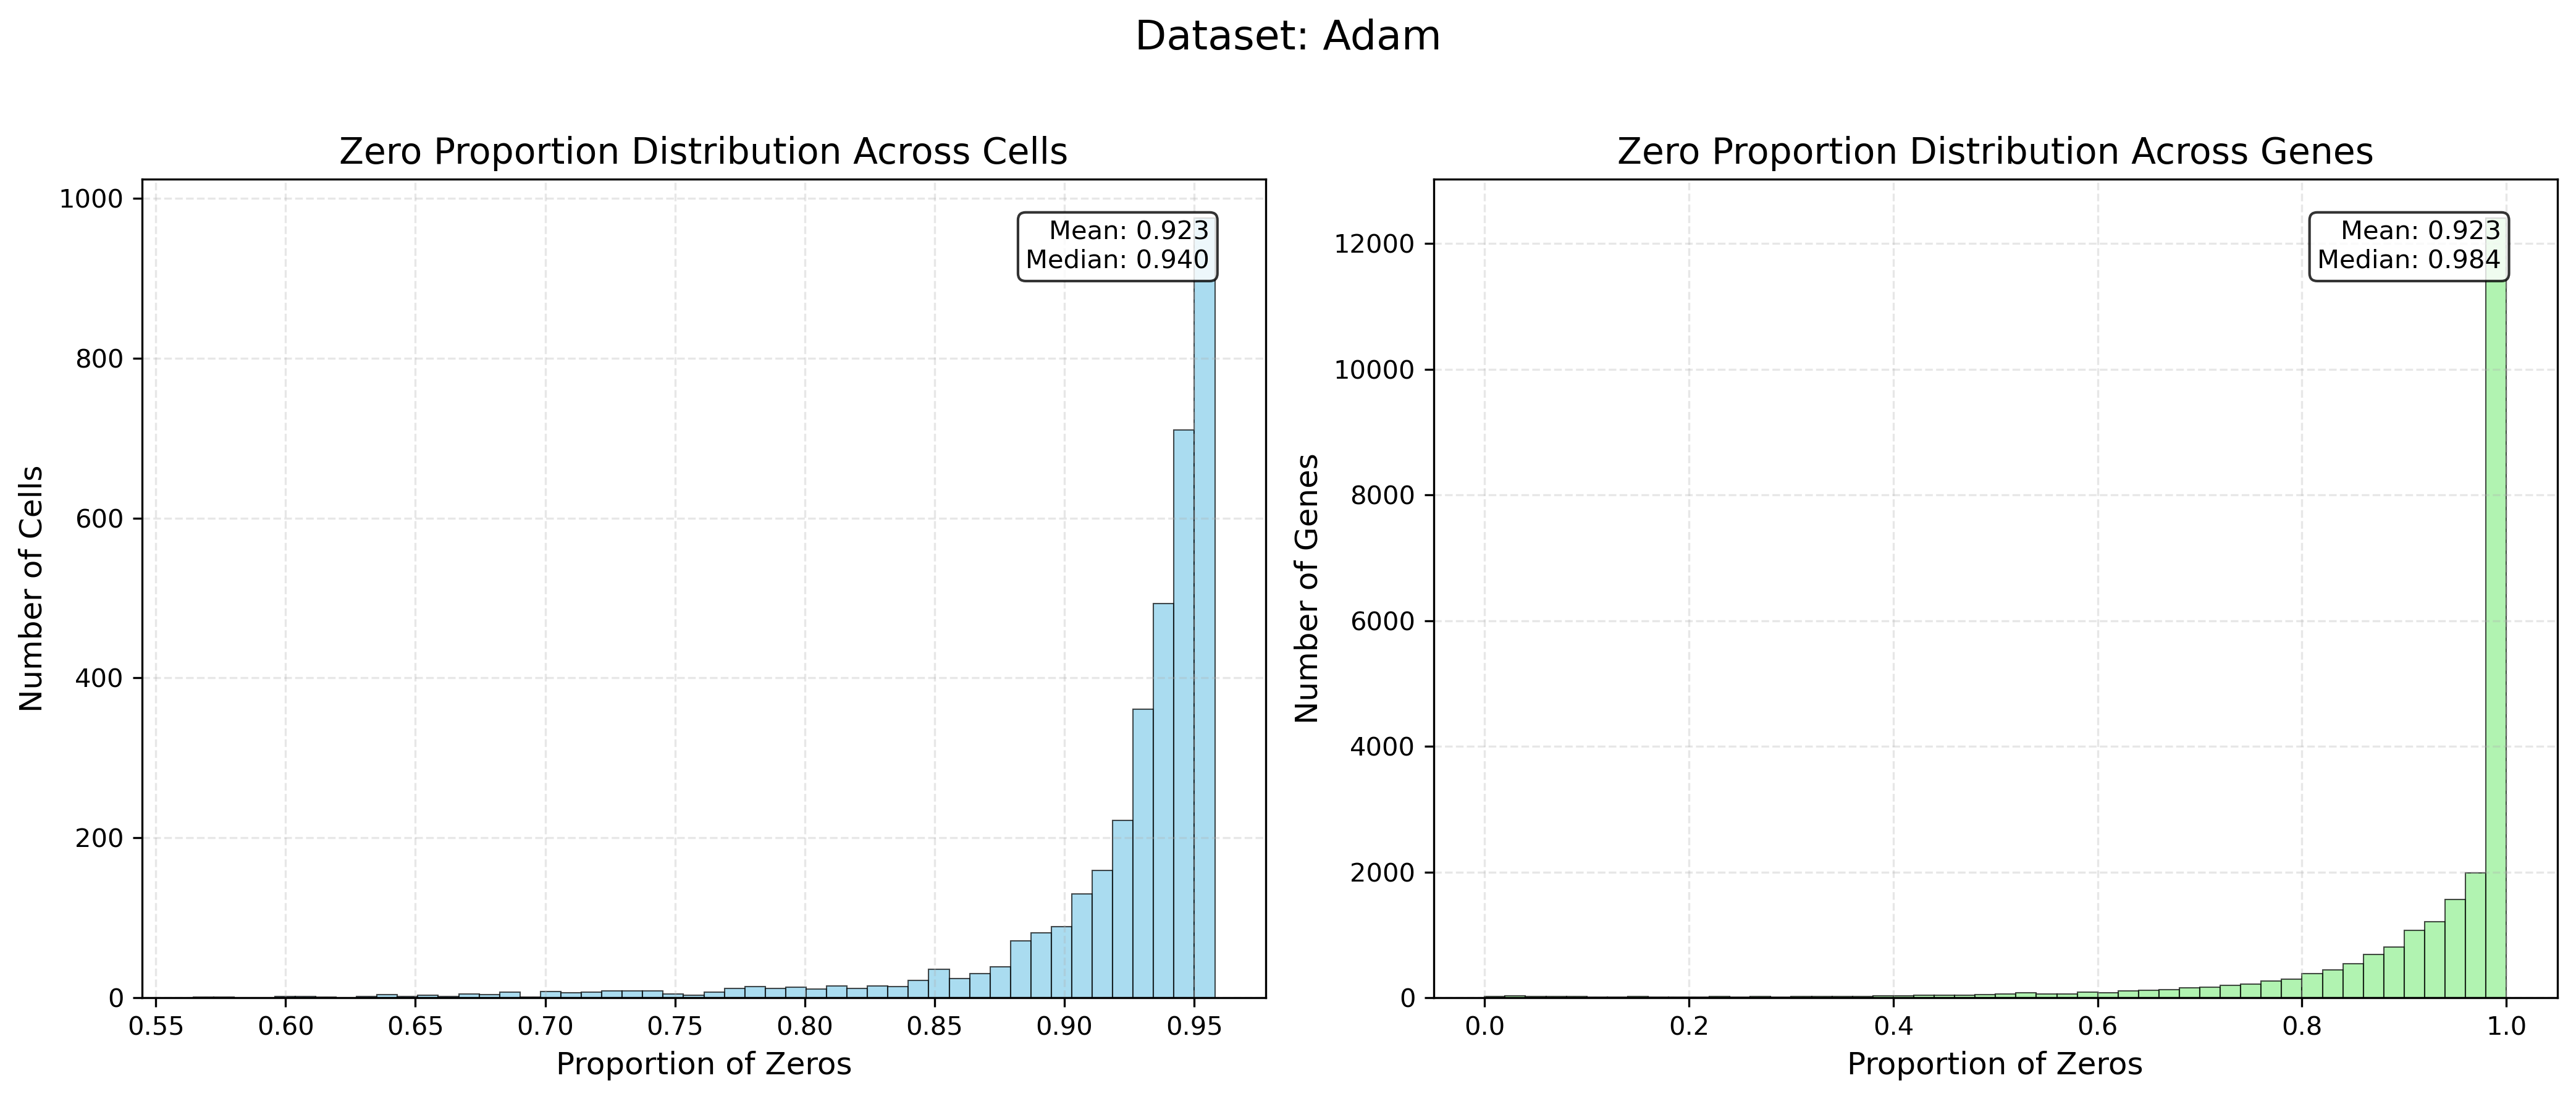

(2122, 19046)
[0 1 2 3 4 5 6 7 8]


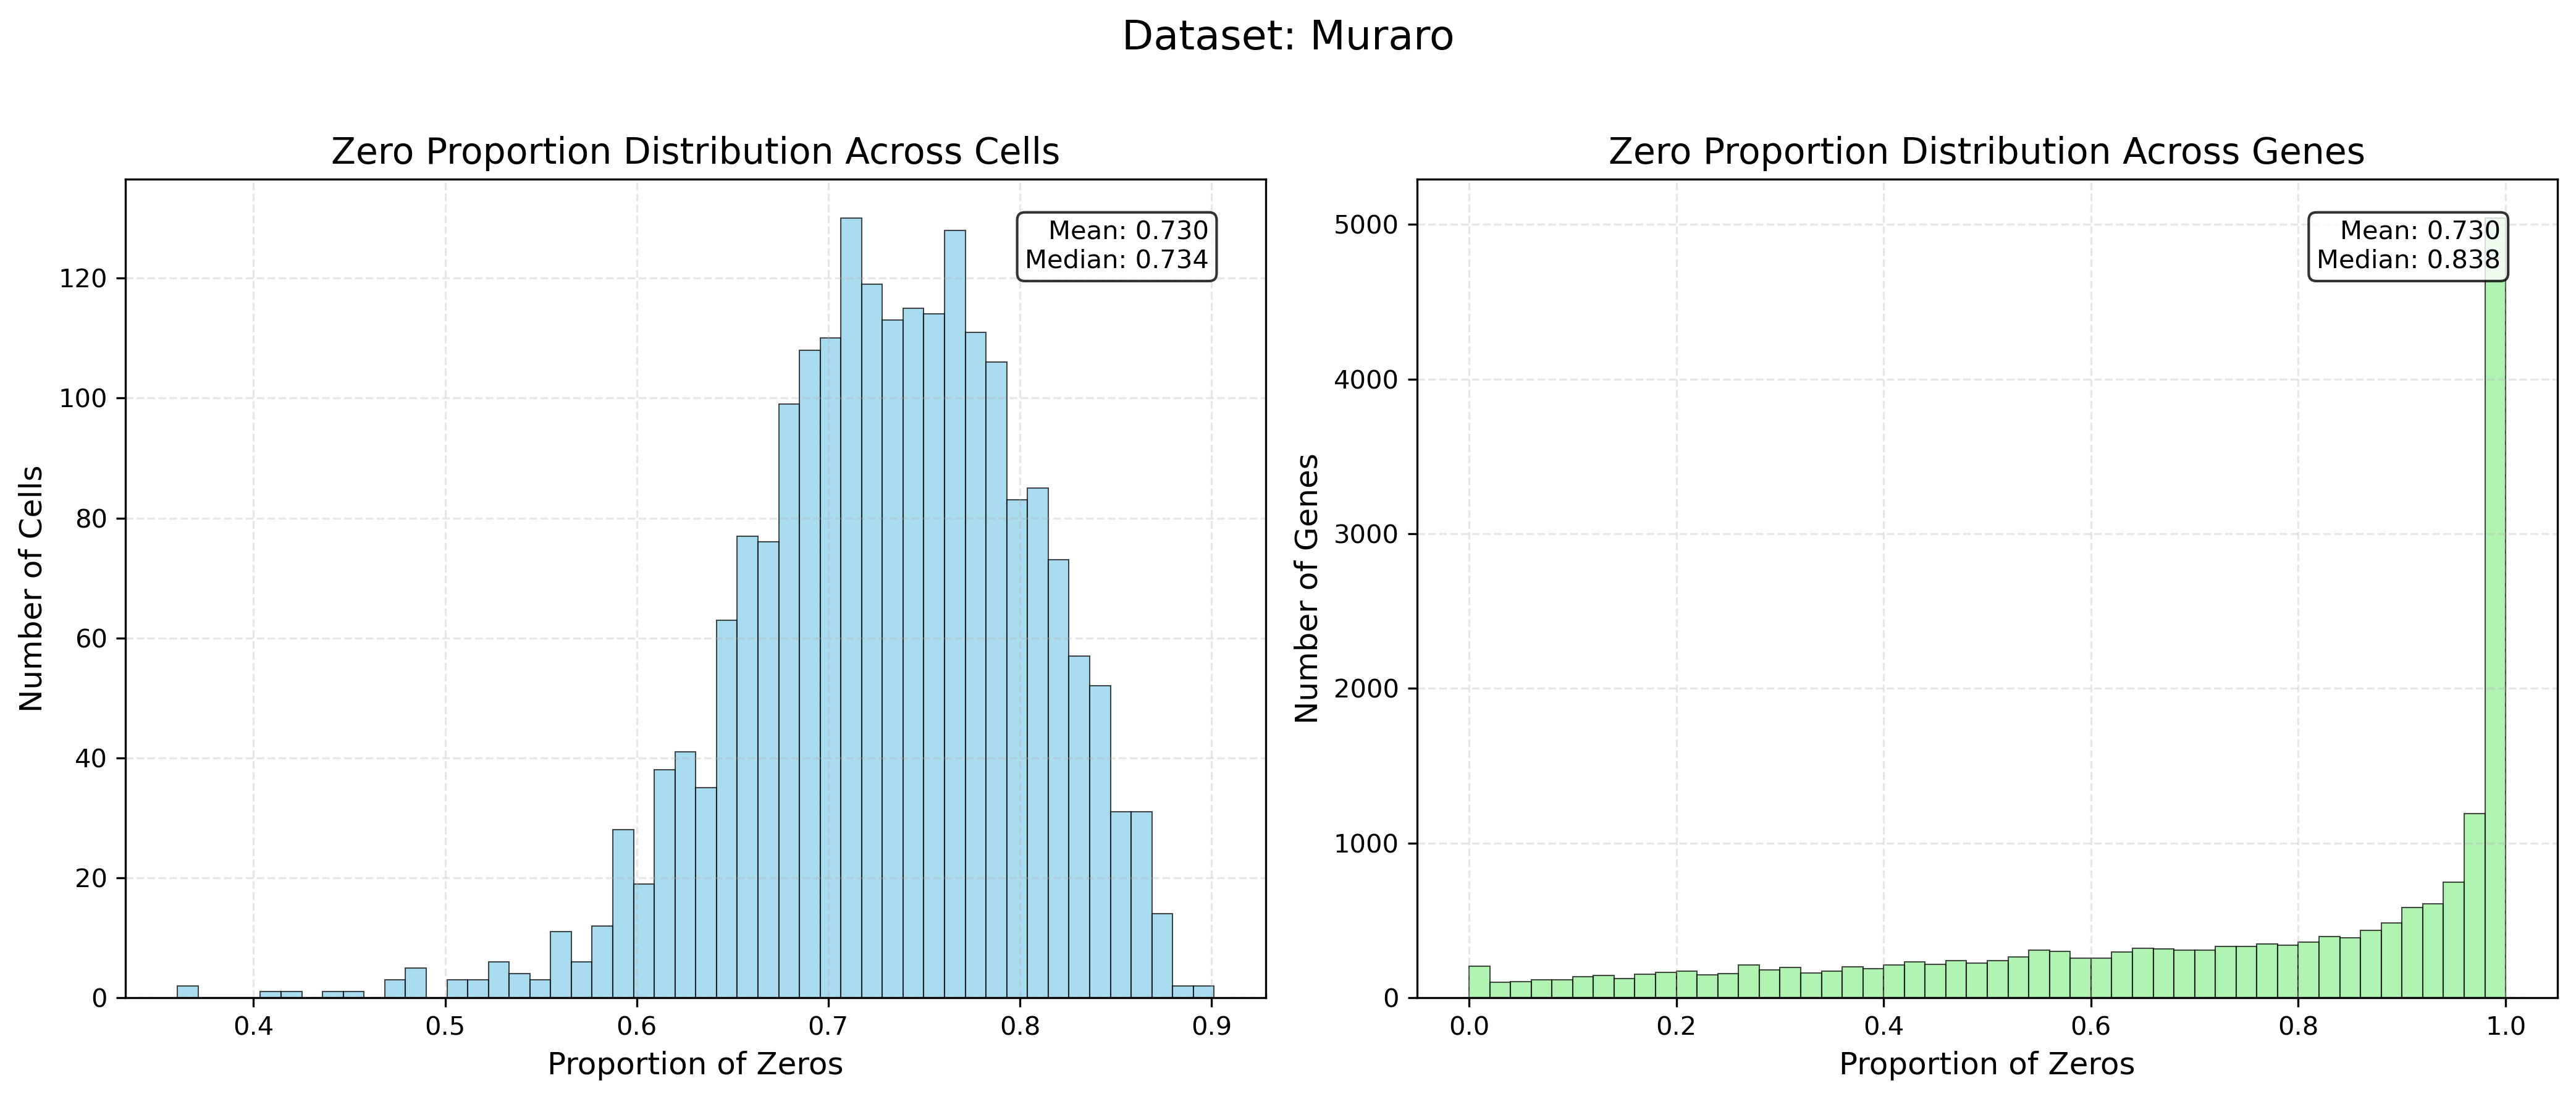

(2500, 23341)
[0 1 2 3]


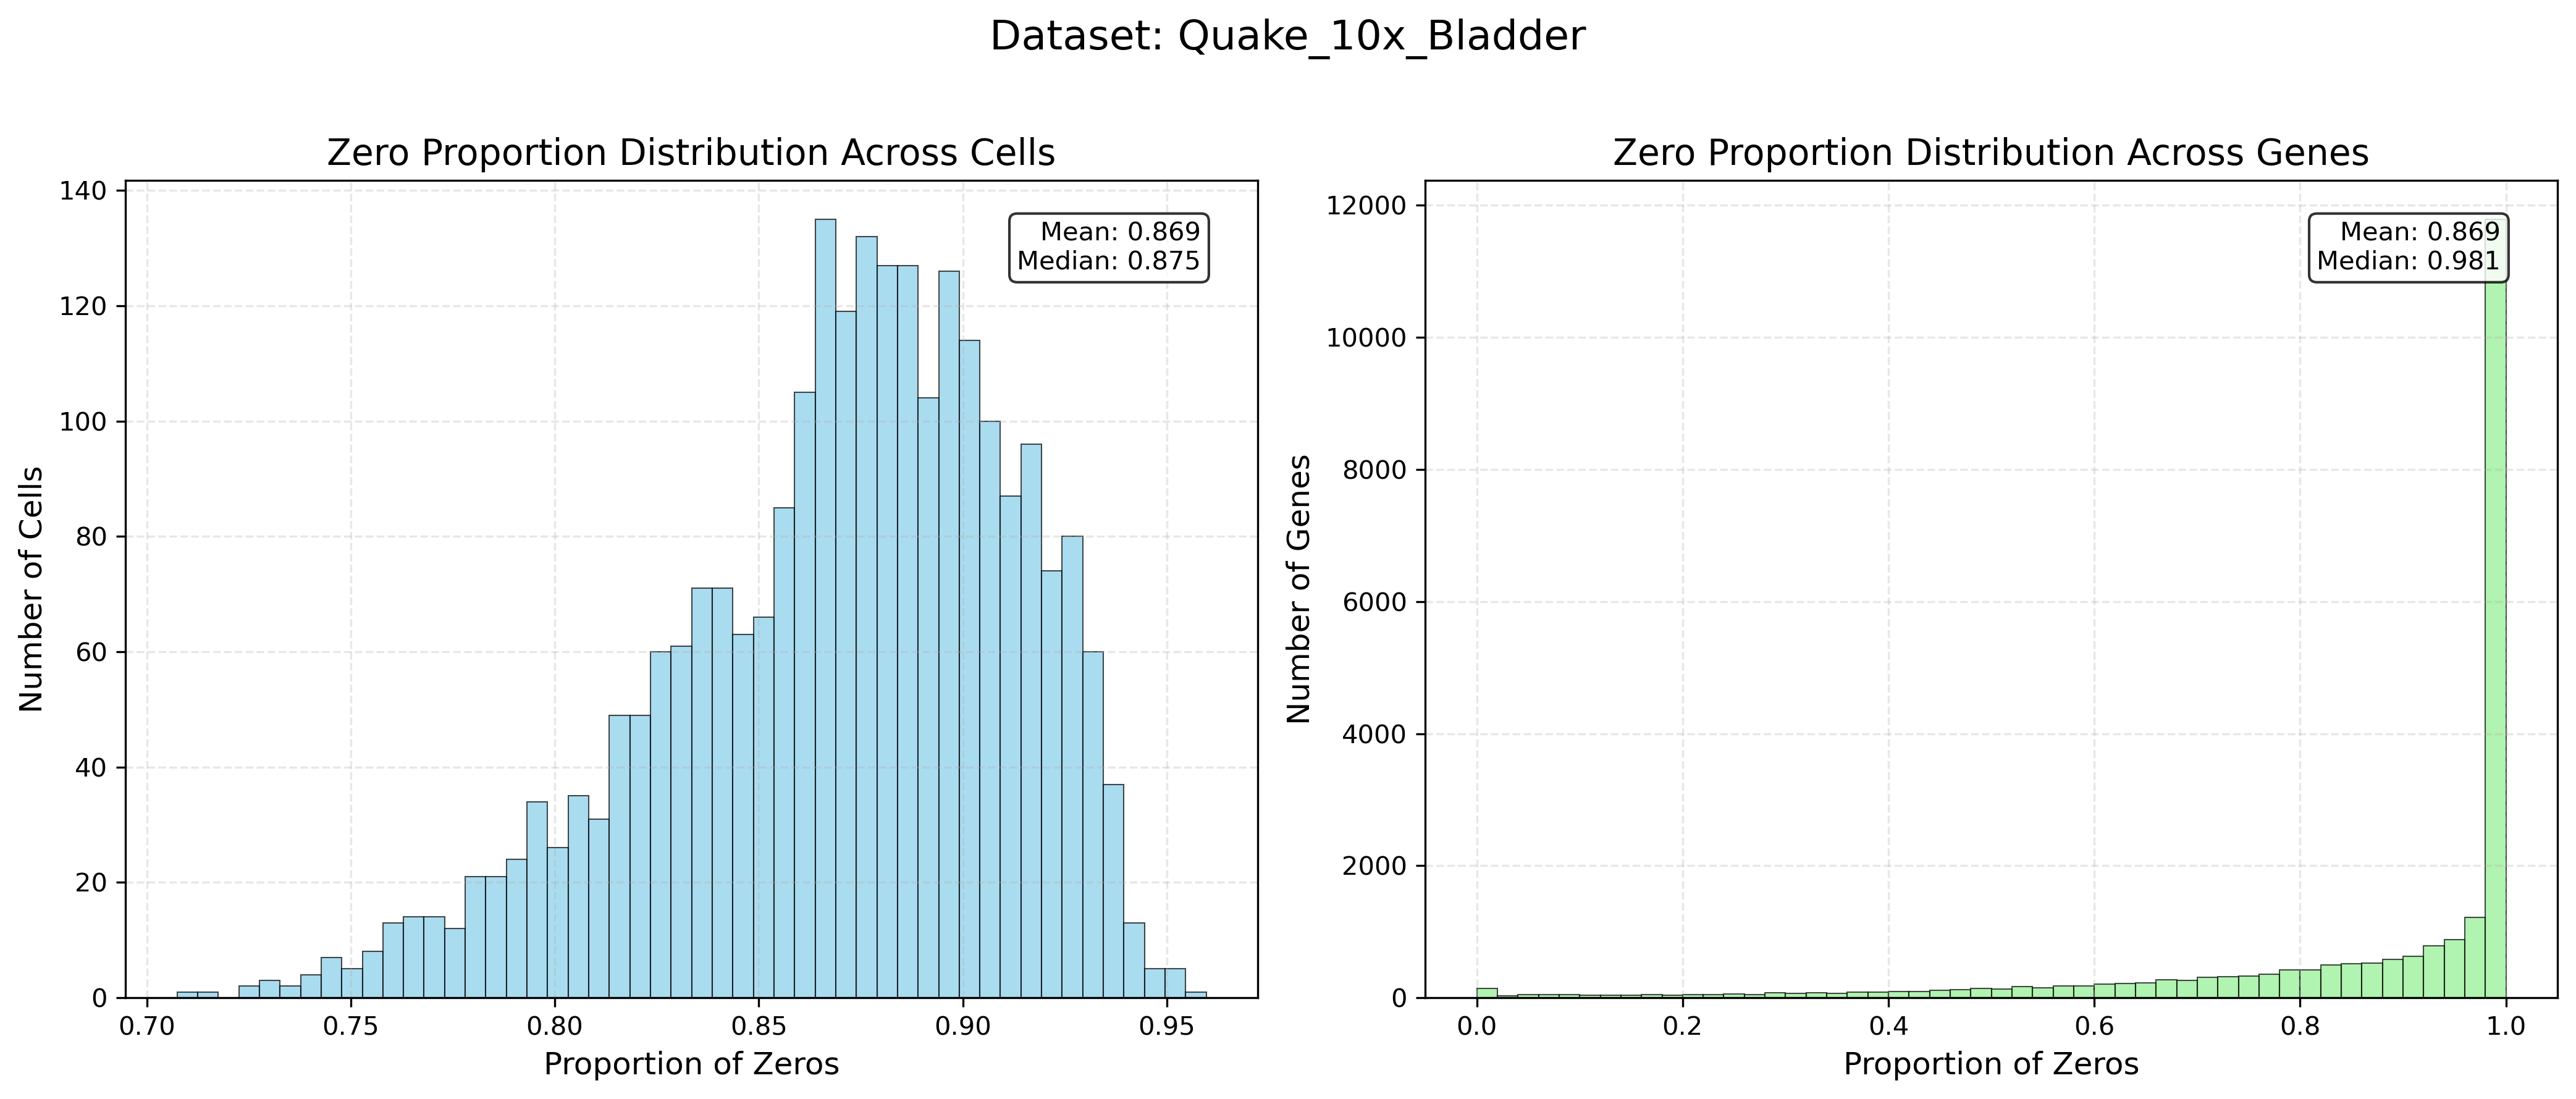

(3909, 23341)
[0 1 2 3 4 5]


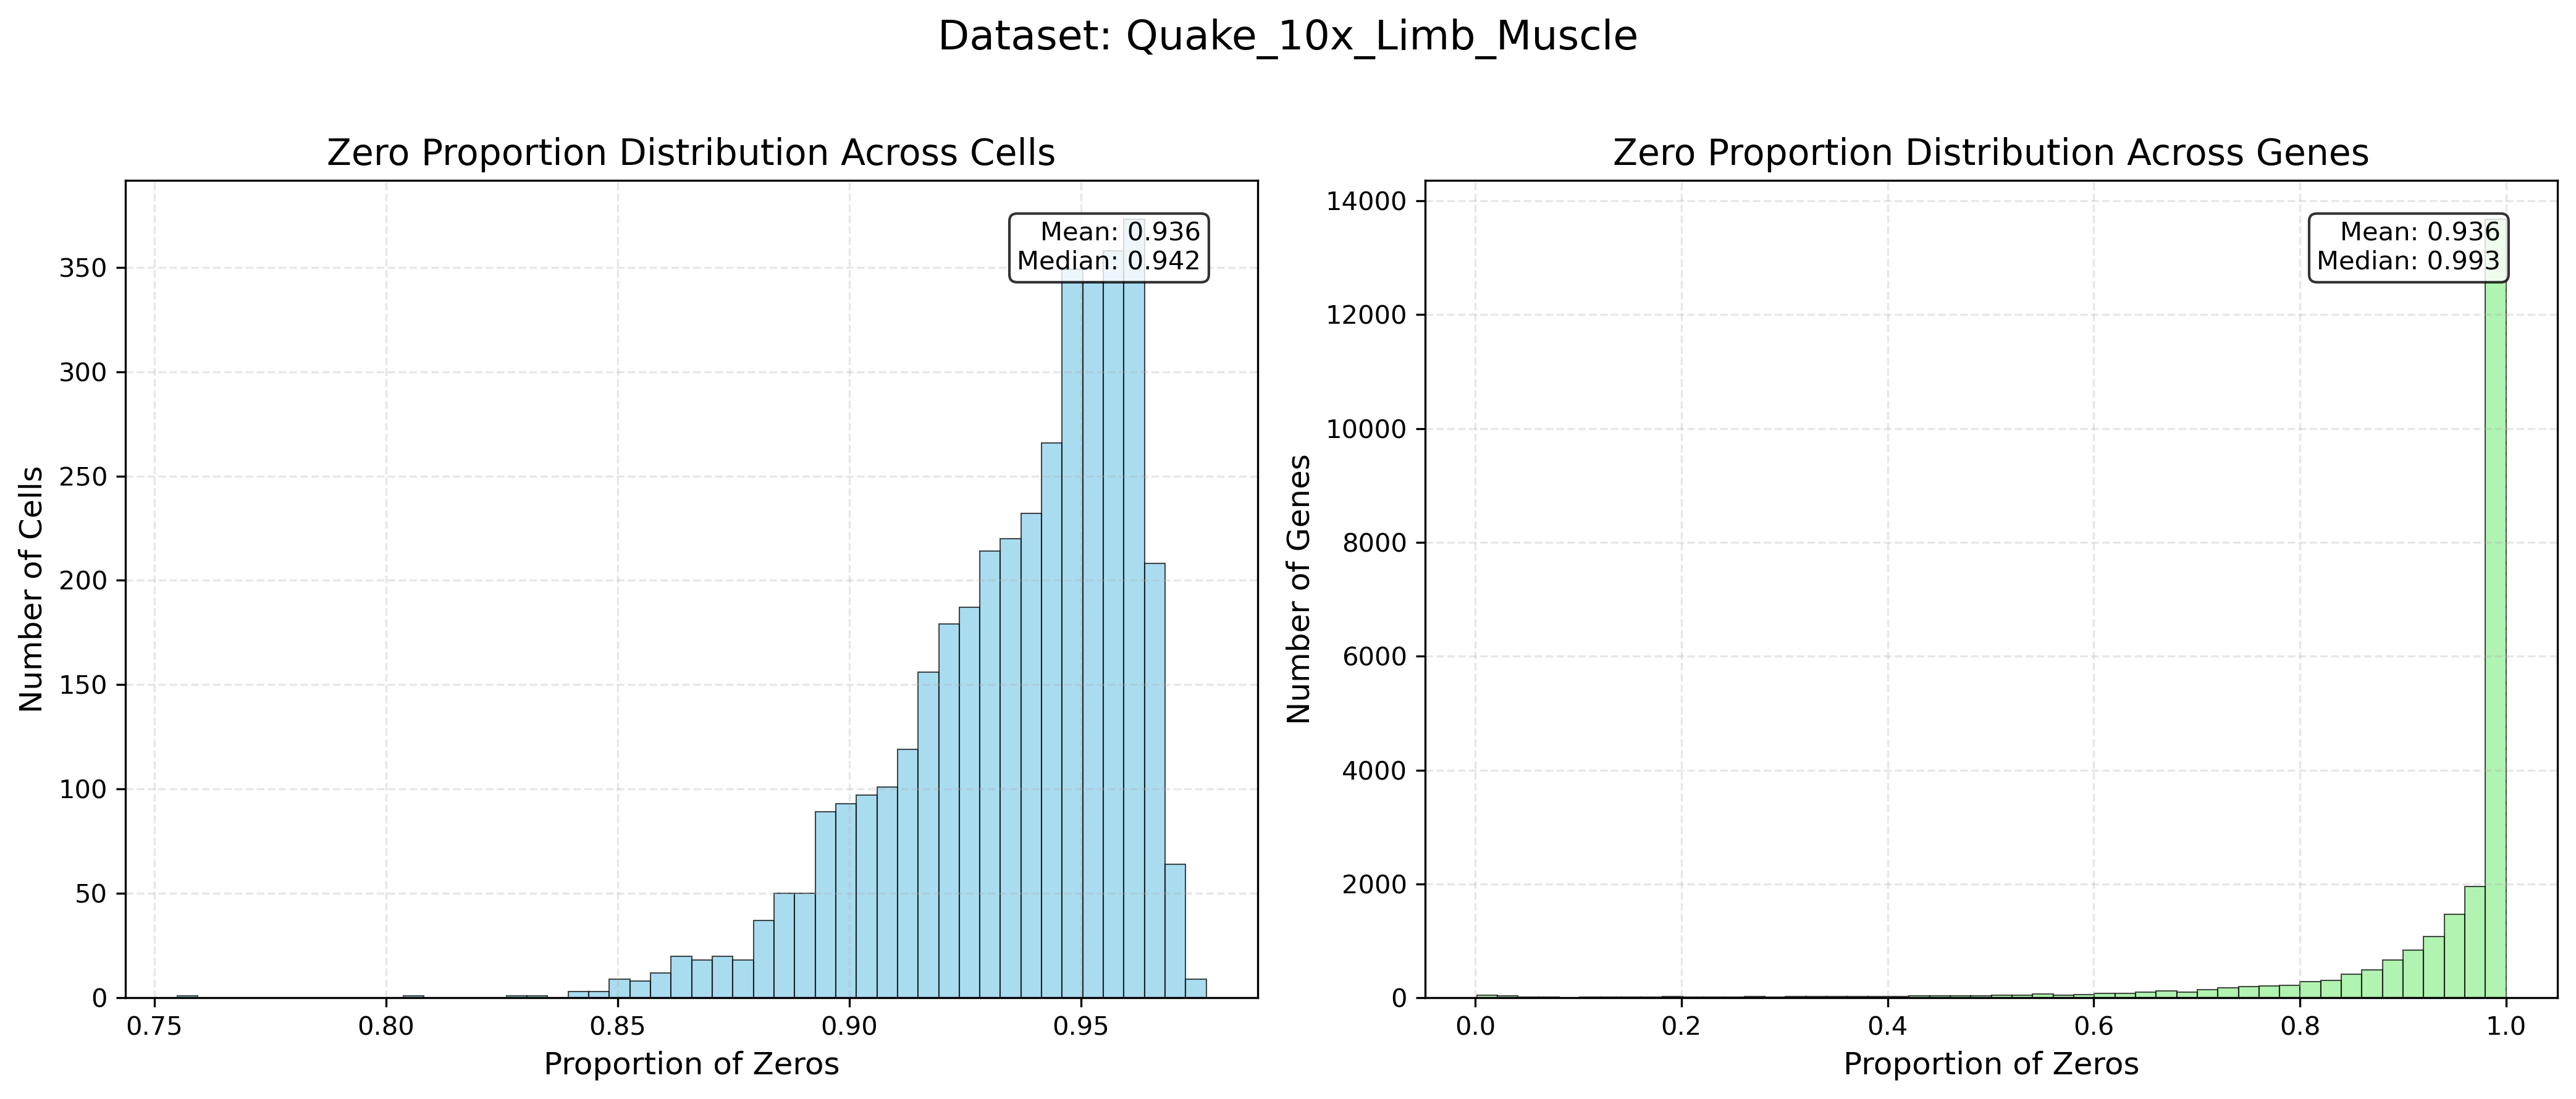

(9552, 23341)
[0 1 2 3 4]


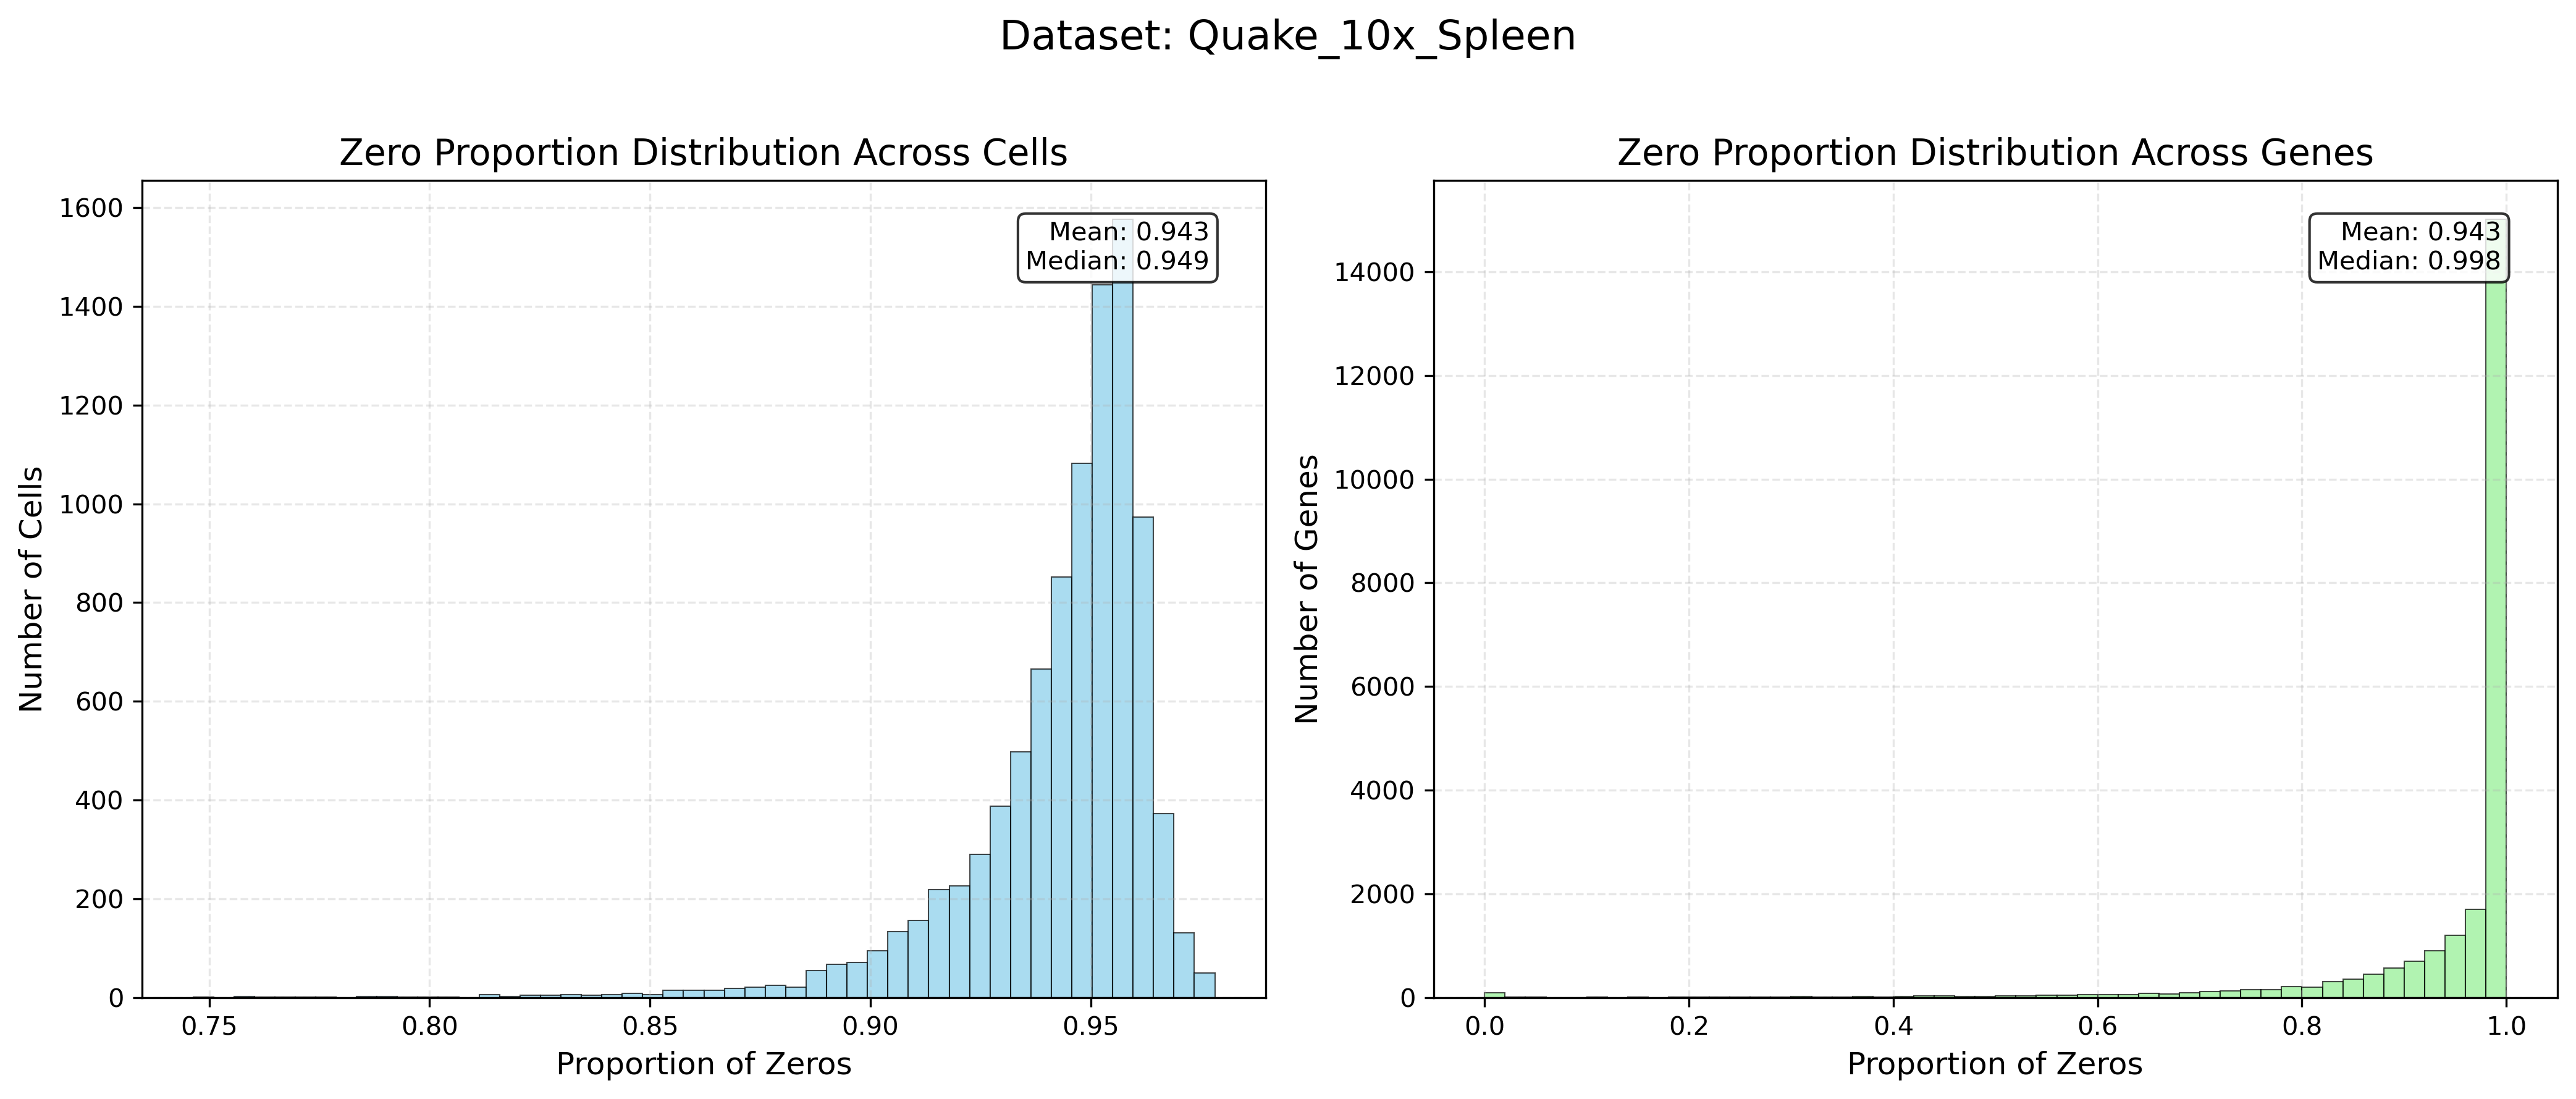

(870, 23341)
[0 1 2 3 4]


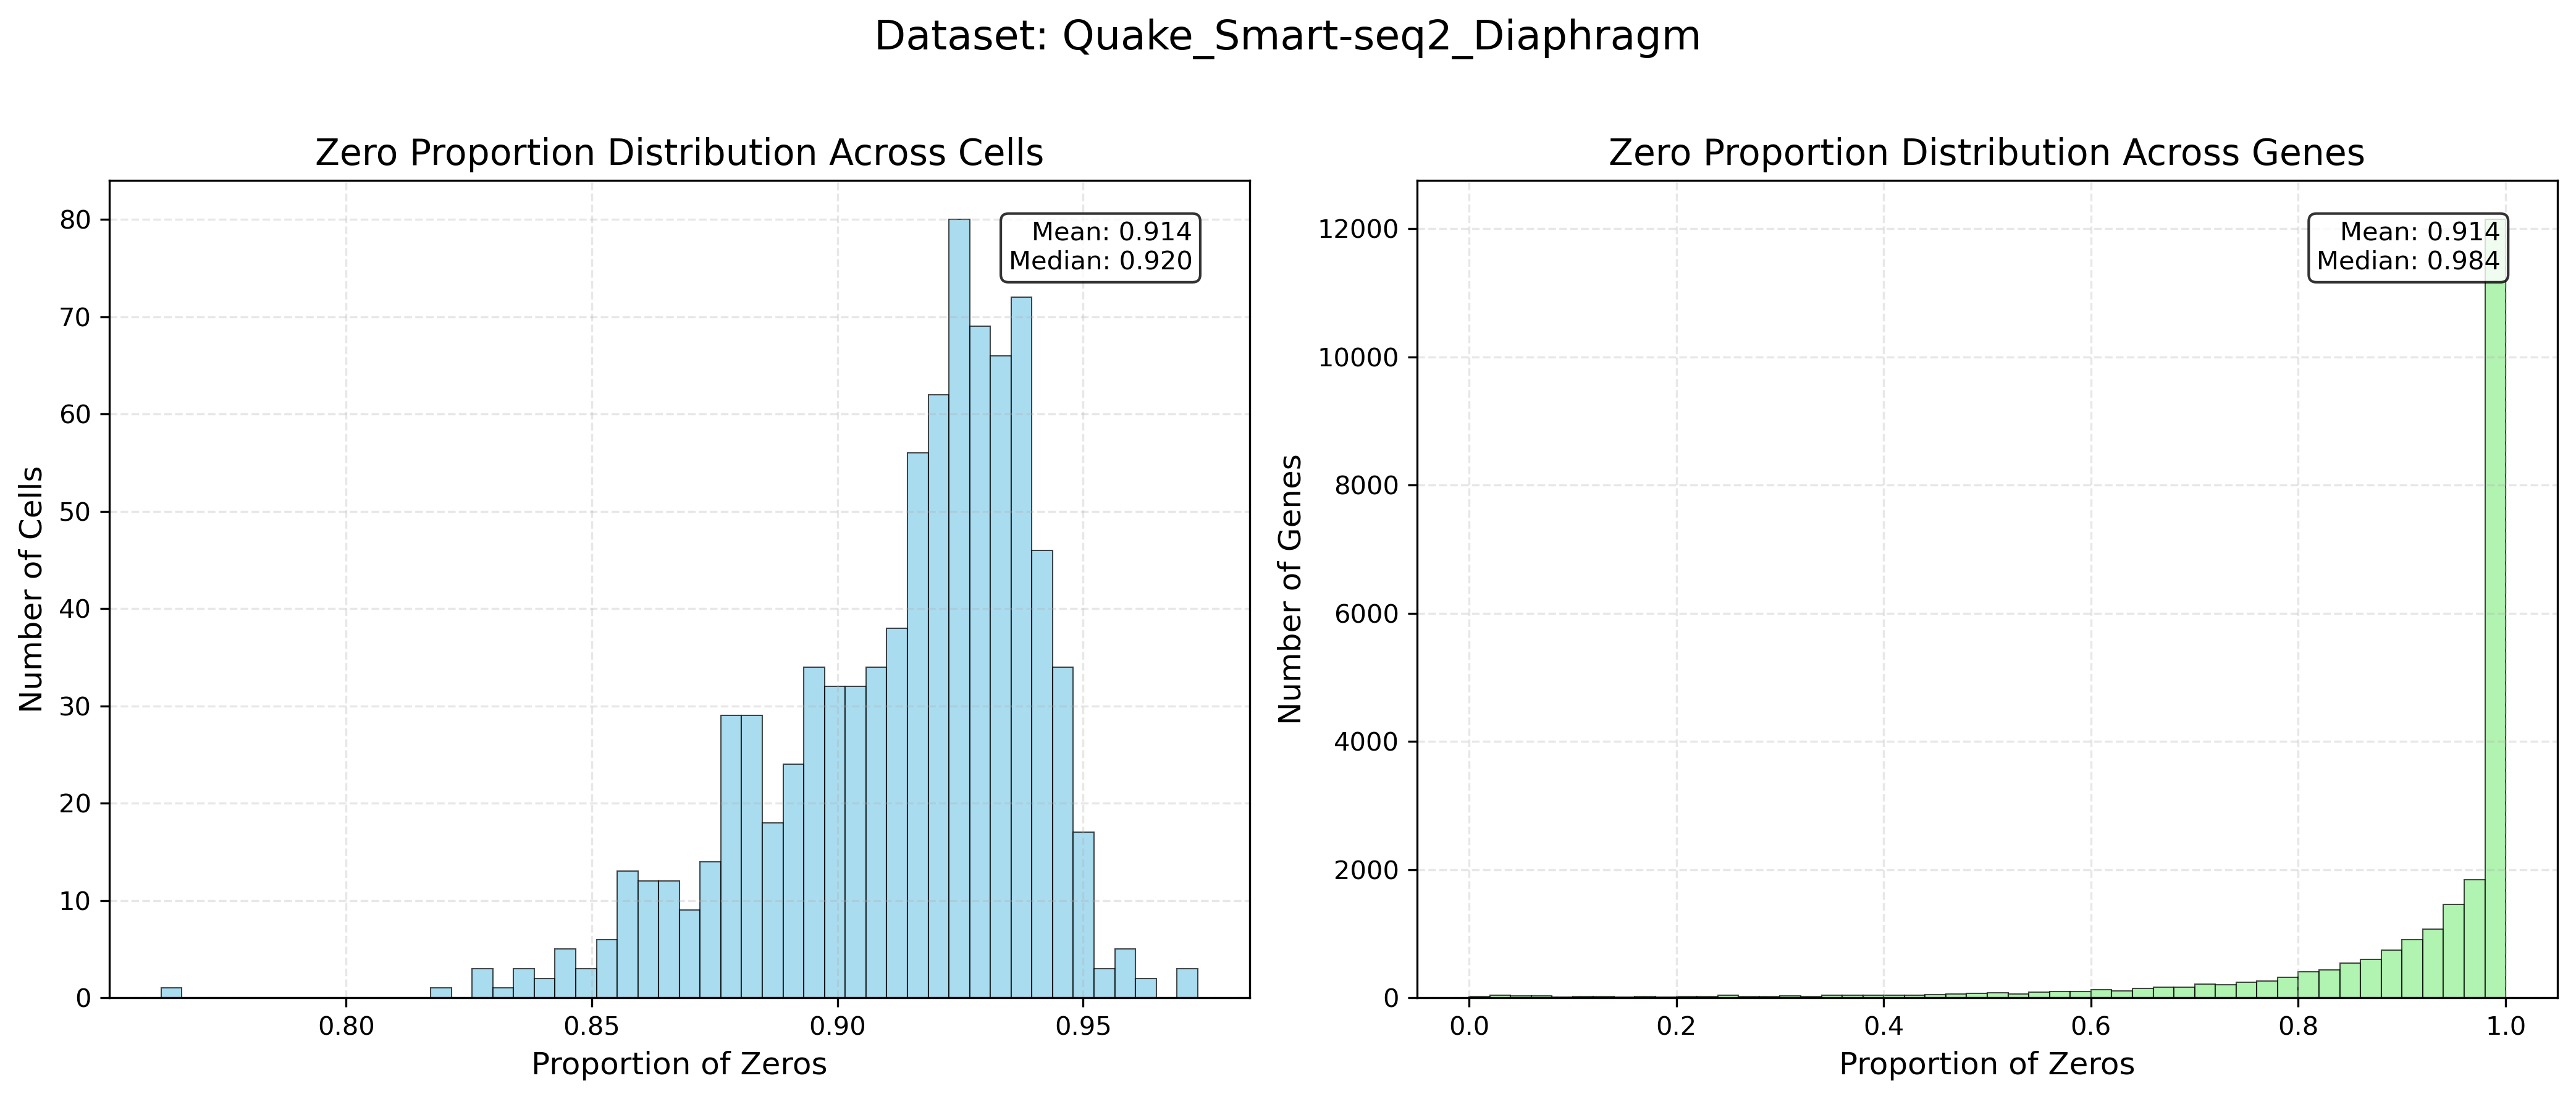

(1090, 23341)
[0 1 2 3 4 5]


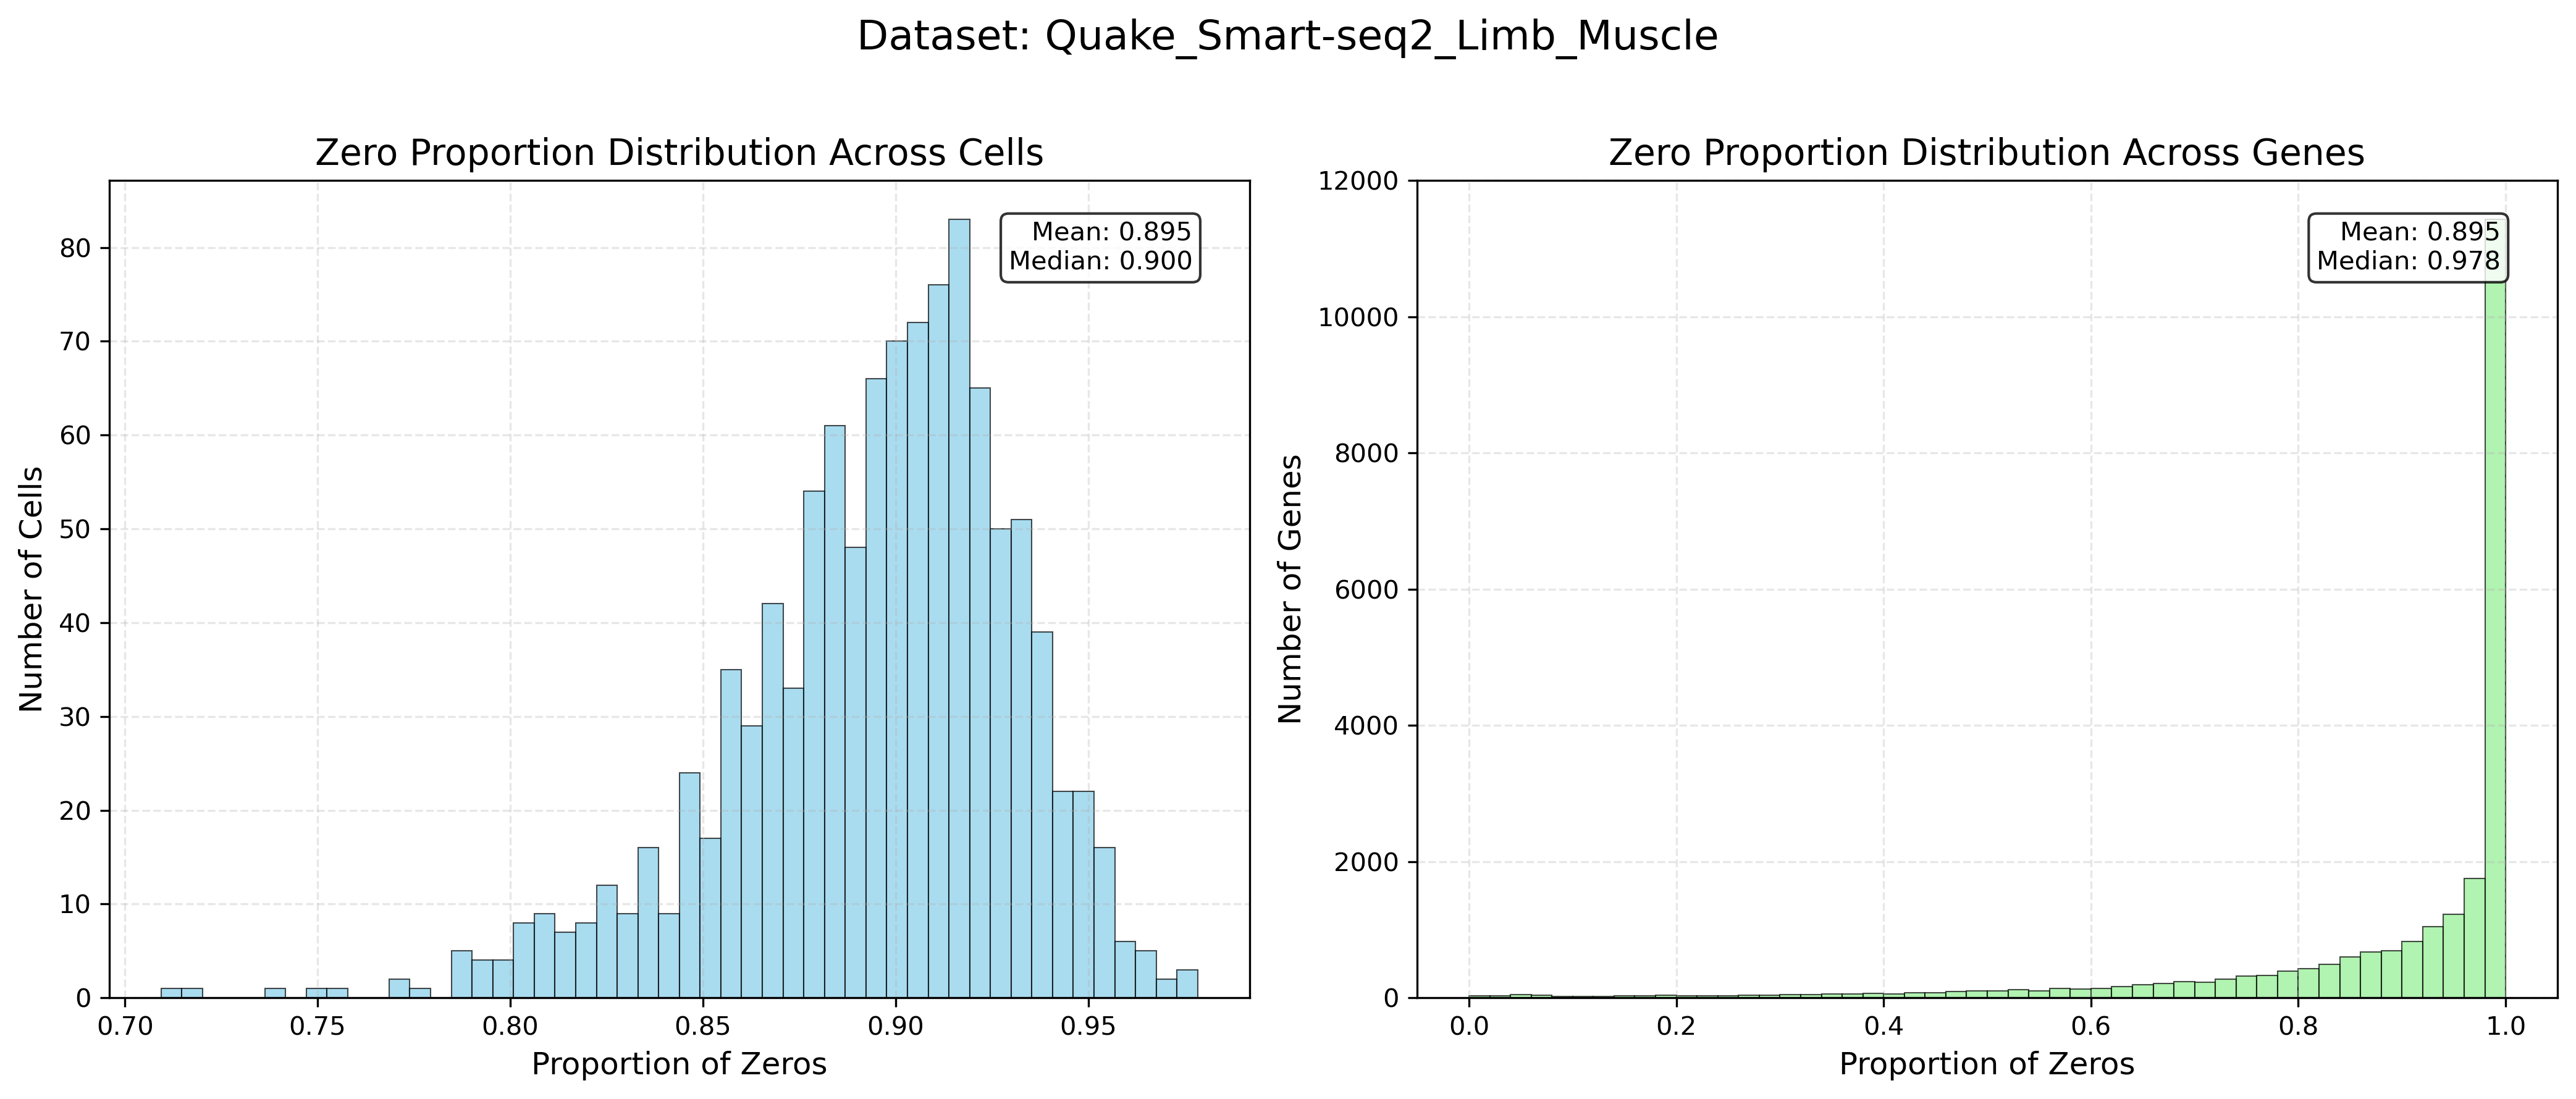

(1676, 23341)
[ 0  1  2  3  4  5  6  7  8  9 10]


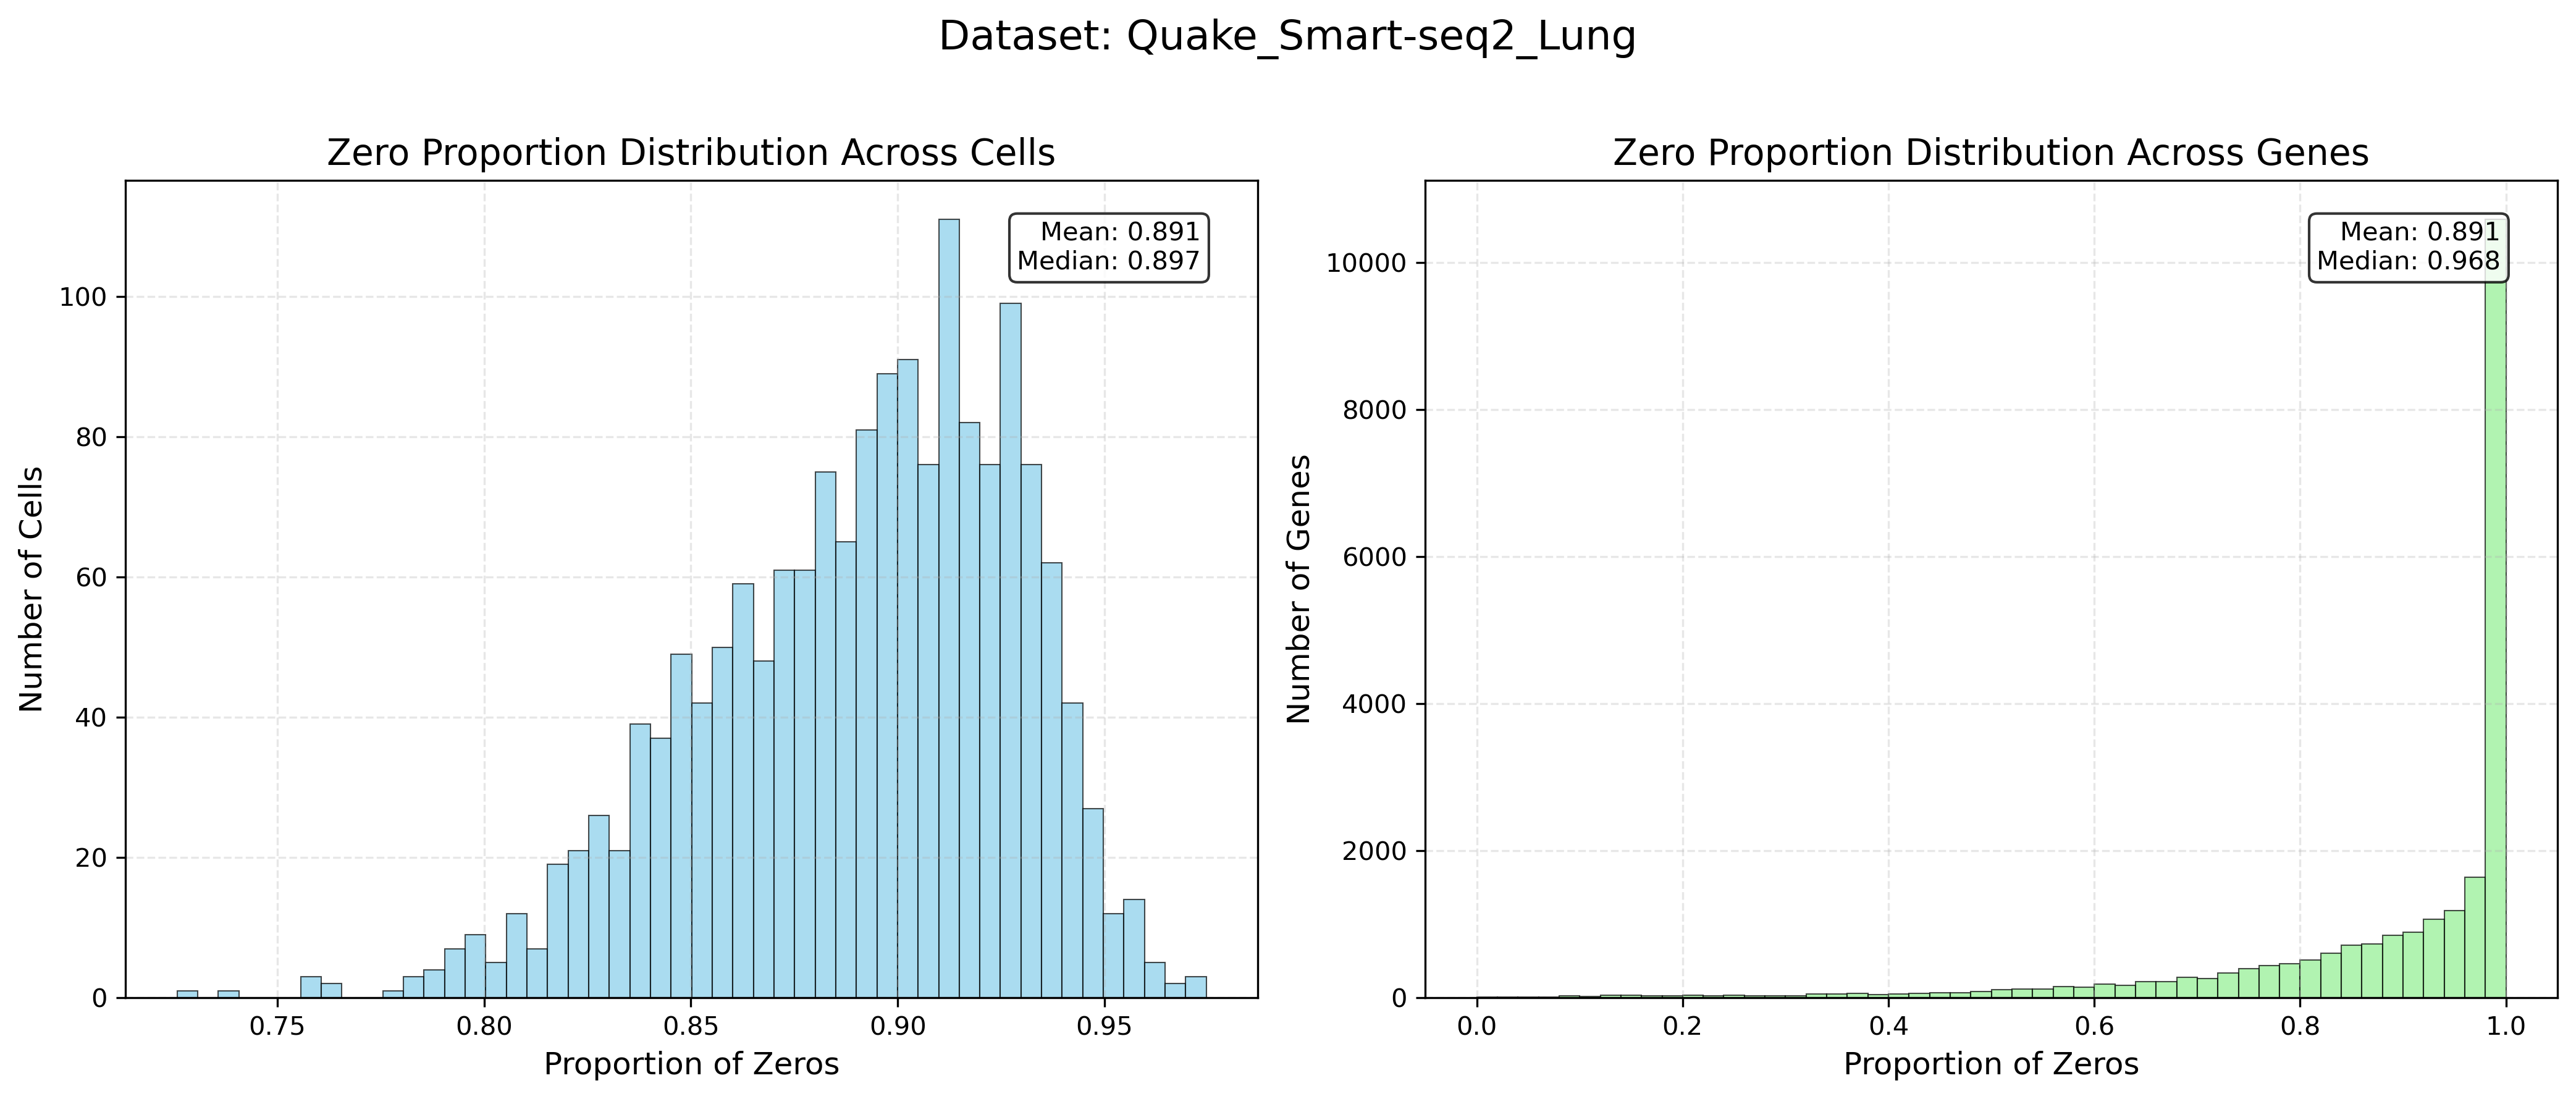

(1350, 23341)
[0 1 2 3]


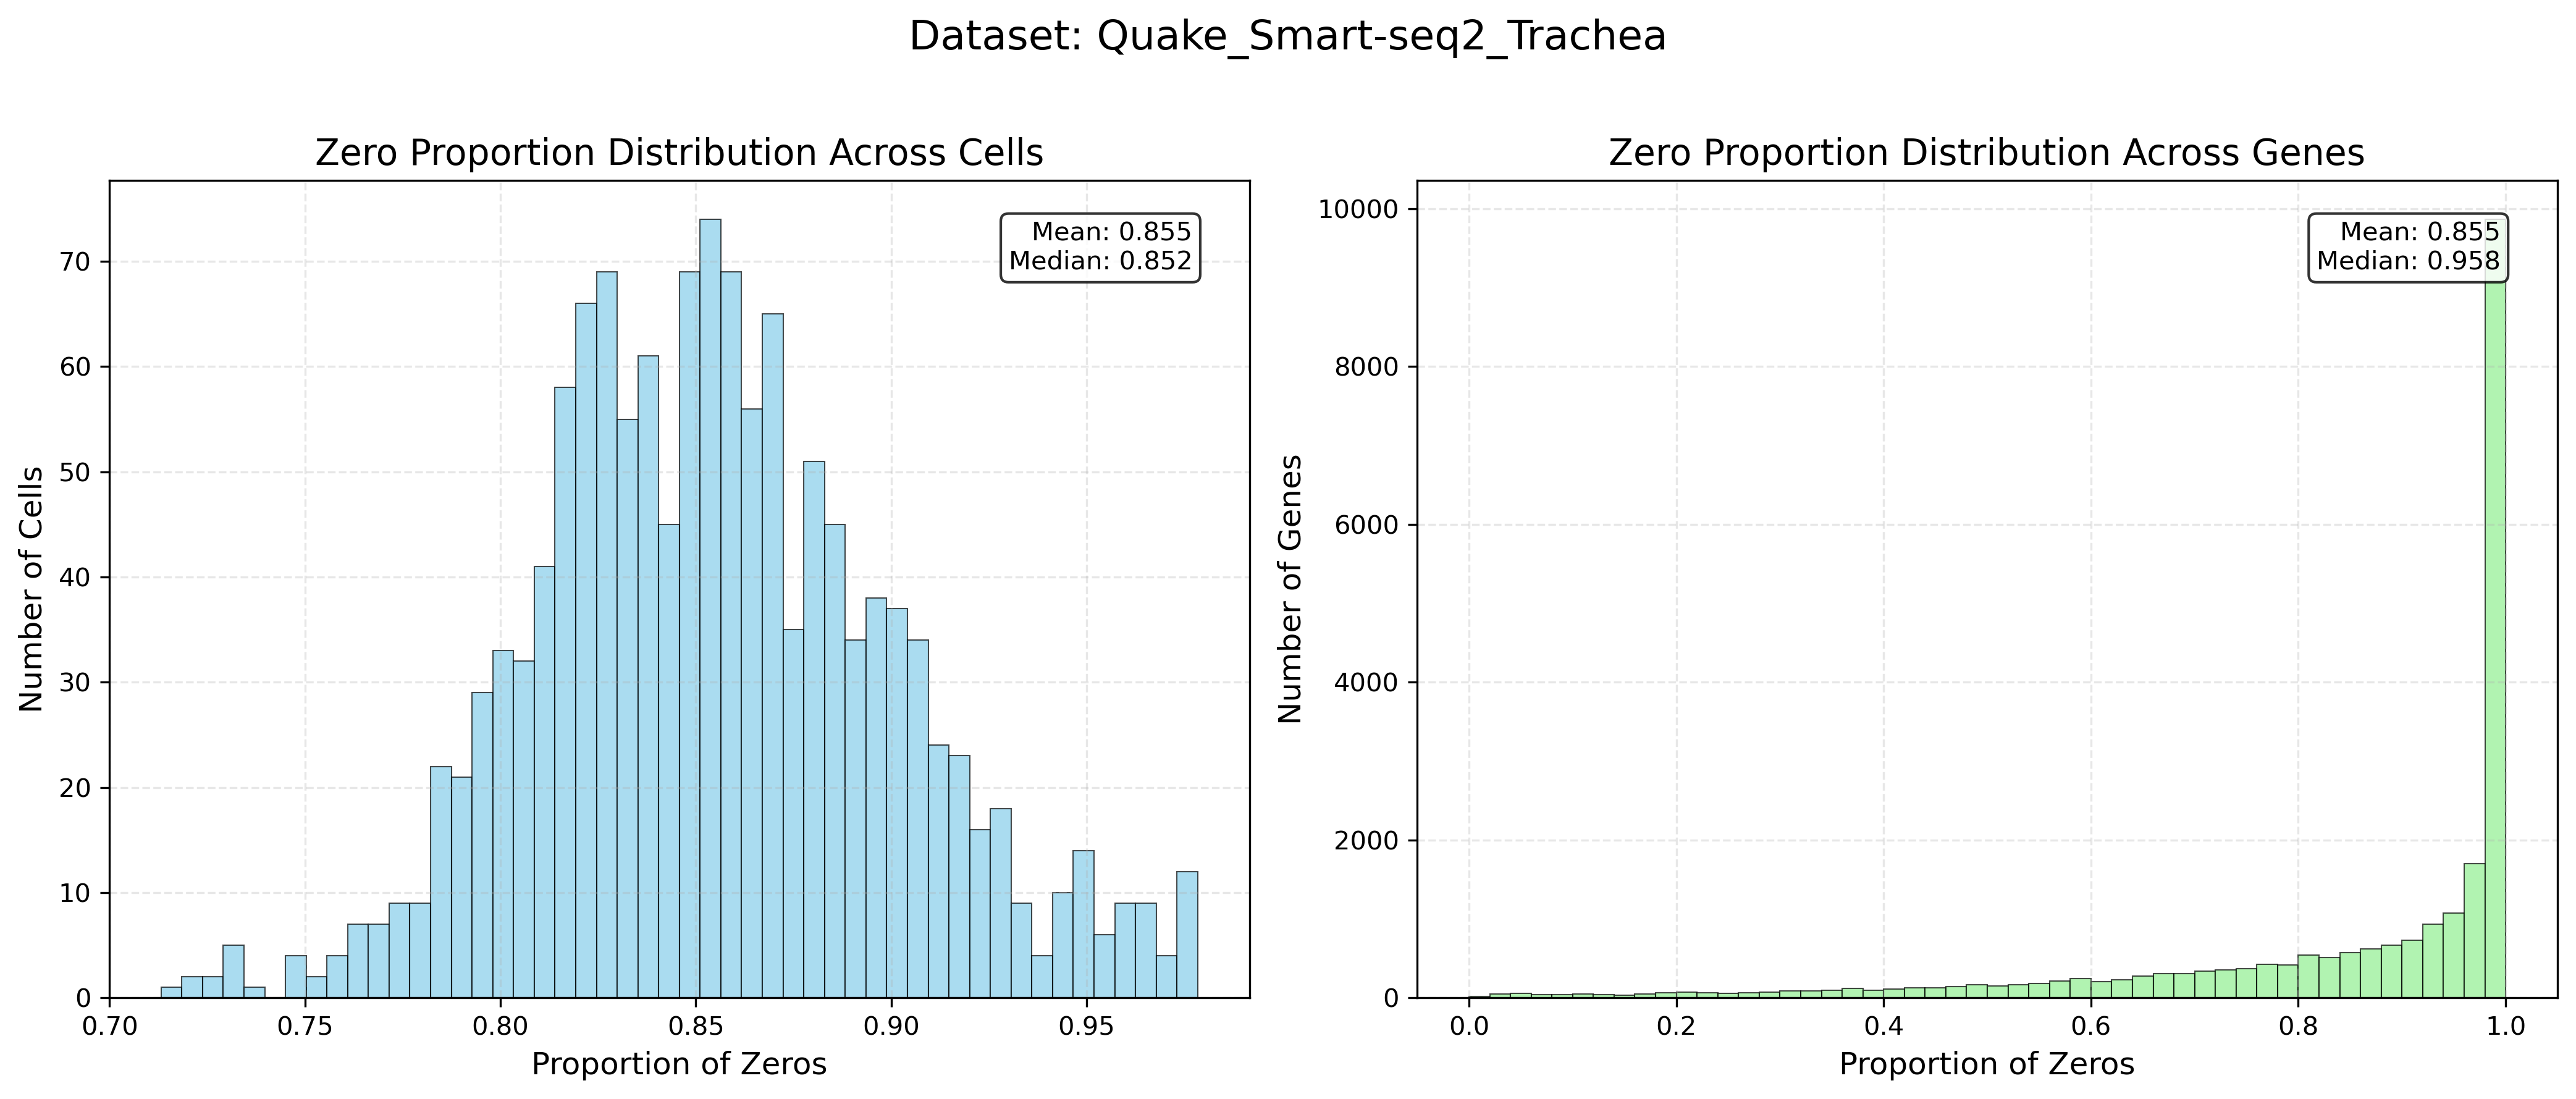

(2881, 21143)
[0 1 2 3 4 5 6]


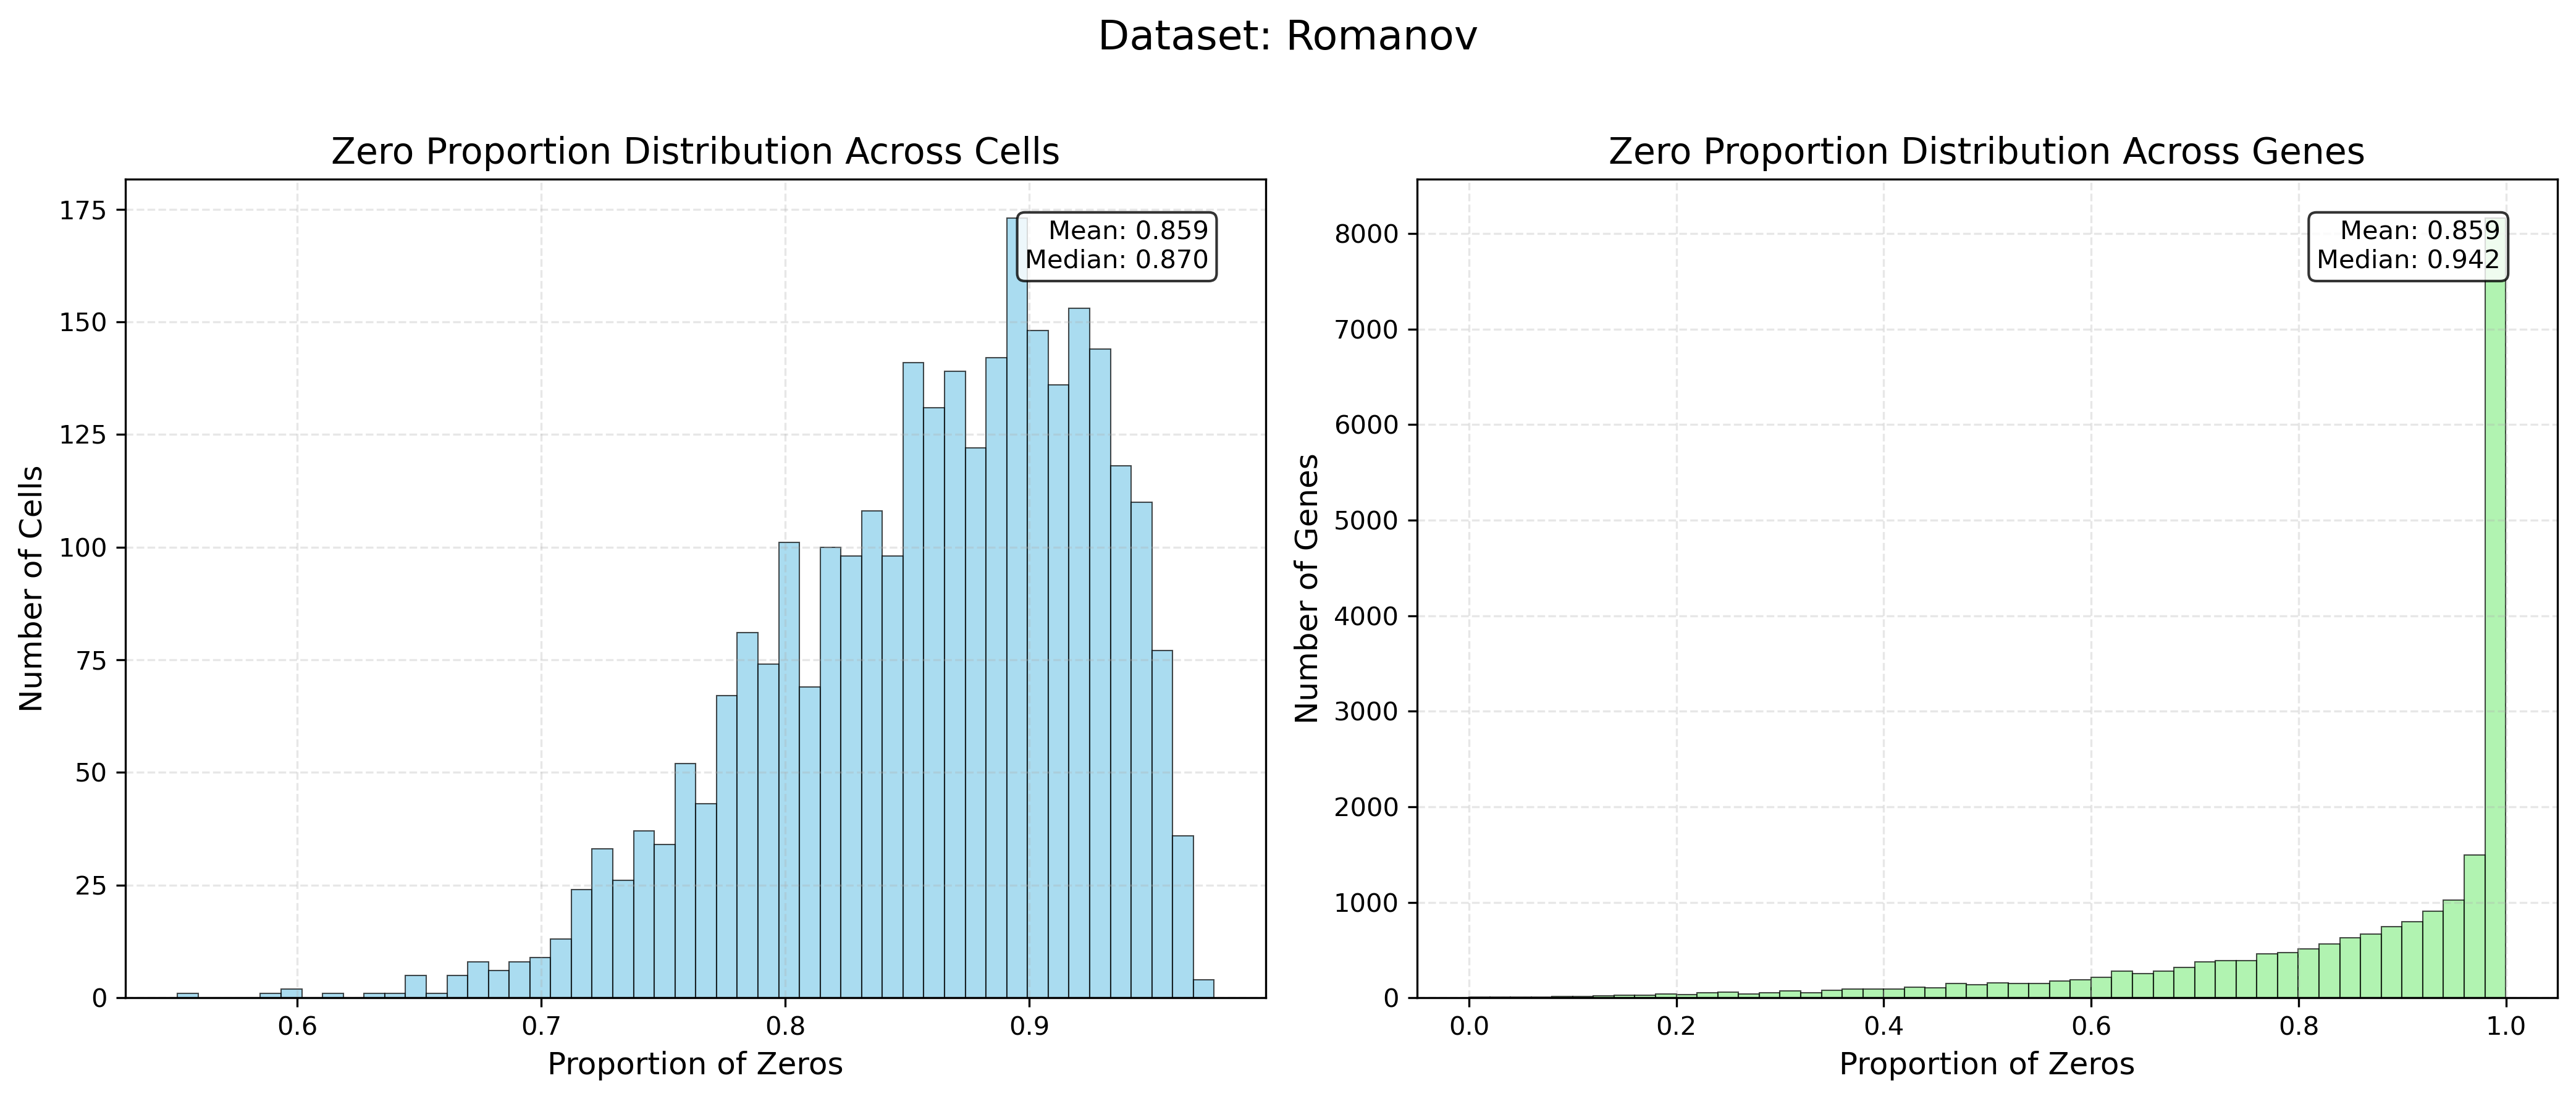

(5685, 33658)
[ 0  1  2  3  4  5  6  7  8  9 10]


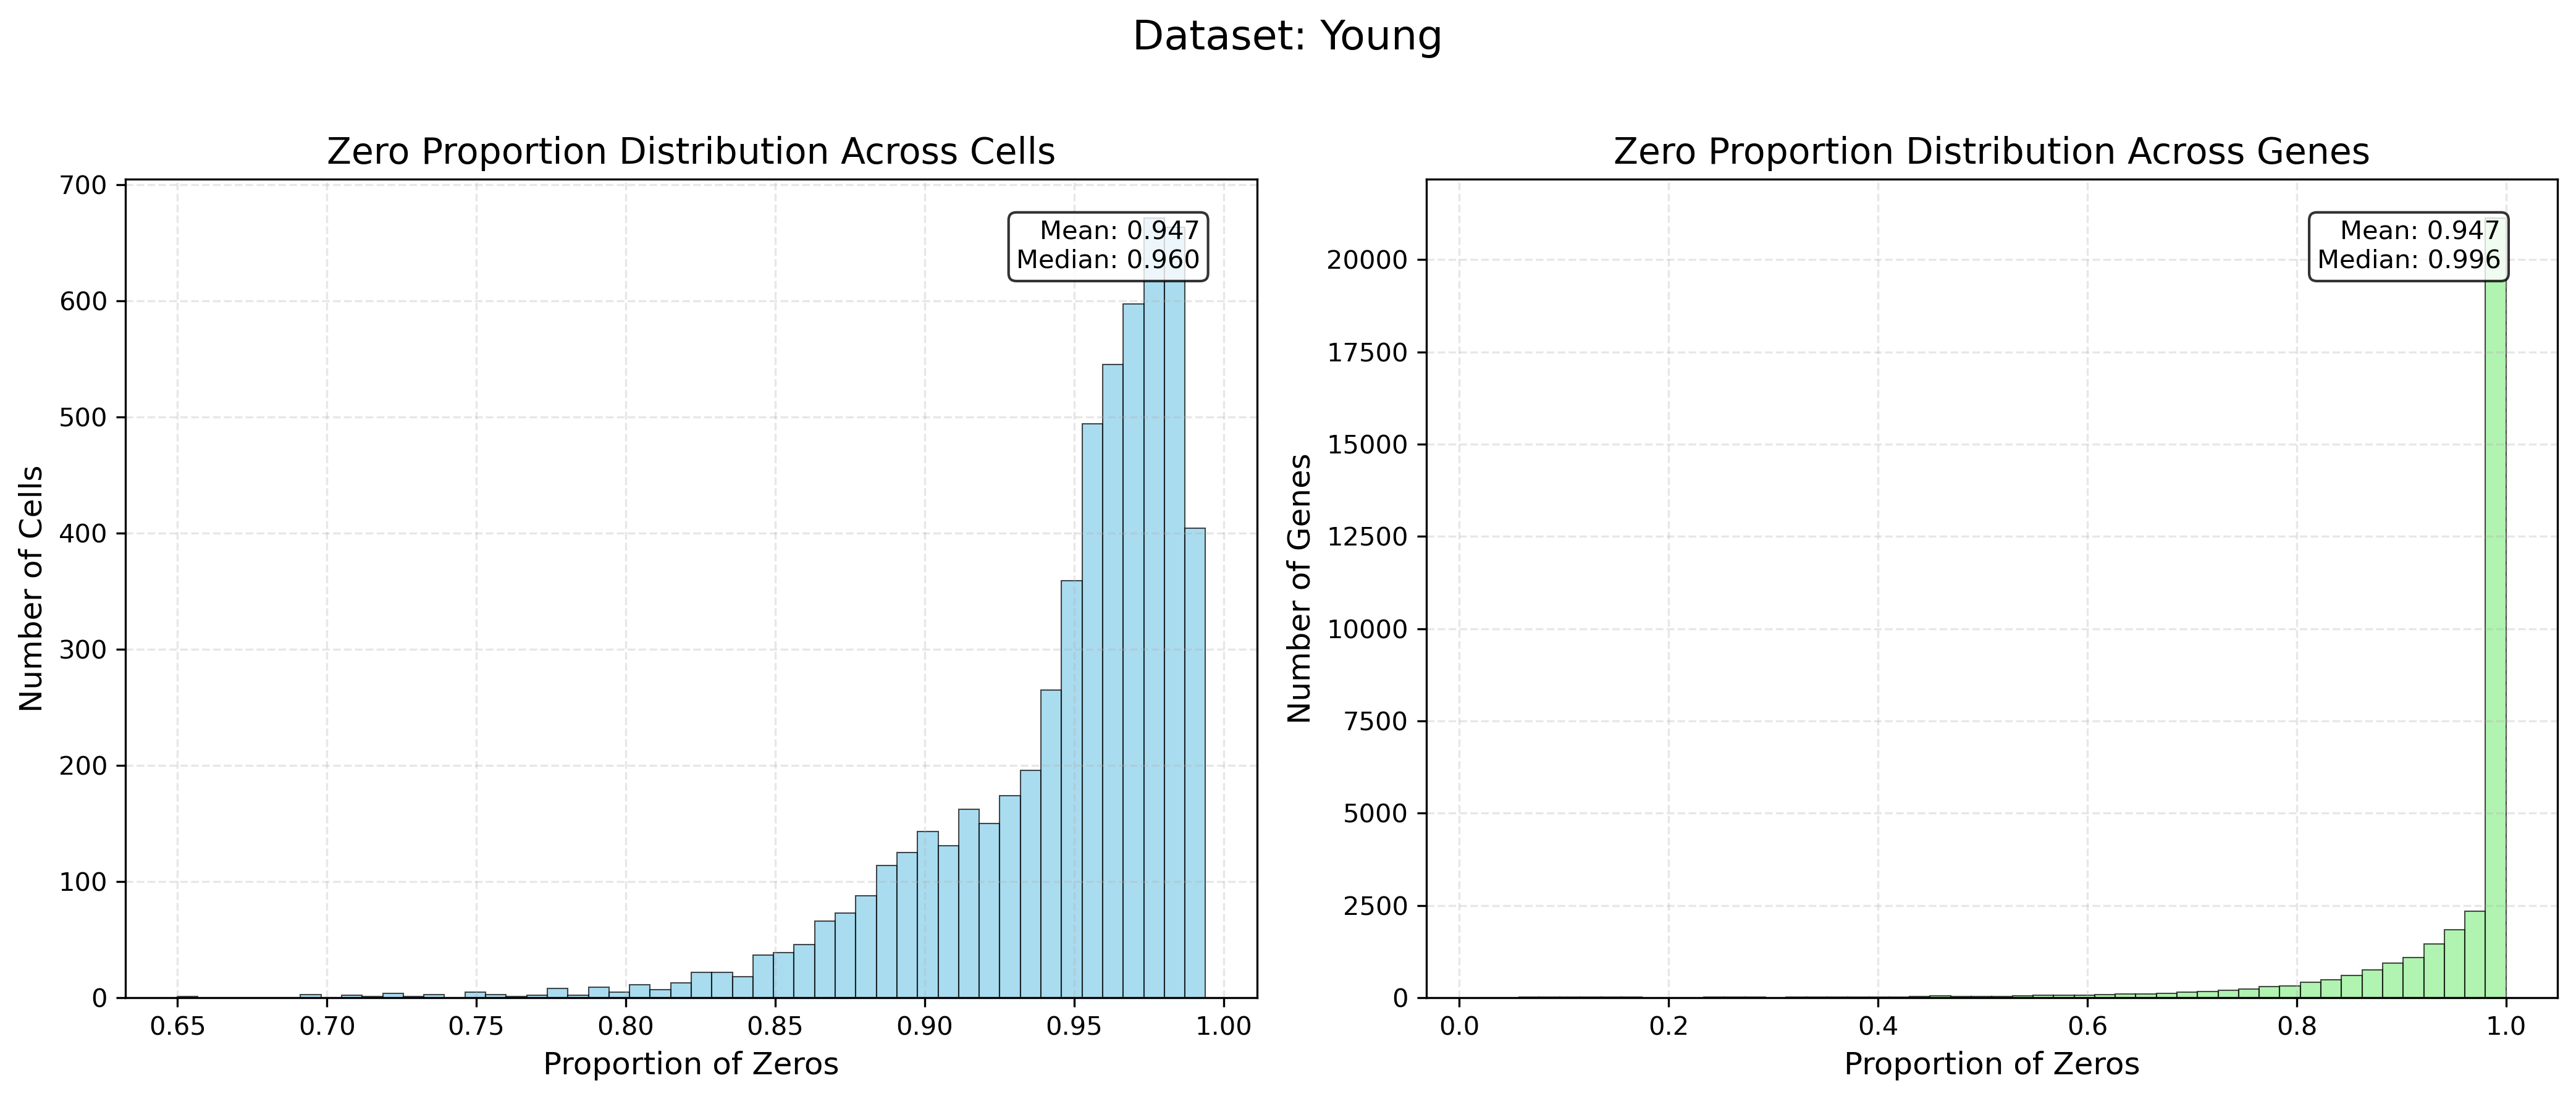

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_zero_distributions(X, dataset_name):
    # Calculate zero proportions
    cell_zeros = (X == 0).mean(axis=1)  # Zero proportion for each cell
    gene_zeros = (X == 0).mean(axis=0)  # Zero proportion for each gene
    
    # Create two subplots with higher DPI for better clarity
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)
    
    # Add dataset name as a suptitle
    fig.suptitle(f'Dataset: {dataset_name}', fontsize=16, y=0.98)
    
    # Cell zero proportion distribution
    ax1.hist(cell_zeros, bins=50, color='skyblue', alpha=0.7, edgecolor='black', linewidth=0.5)
    ax1.set_title('Zero Proportion Distribution Across Cells', fontsize=14)
    ax1.set_xlabel('Proportion of Zeros', fontsize=12)
    ax1.set_ylabel('Number of Cells', fontsize=12)
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.grid(alpha=0.3, linestyle='--')
    
    # Gene zero proportion distribution
    ax2.hist(gene_zeros, bins=50, color='lightgreen', alpha=0.7, edgecolor='black', linewidth=0.5)
    ax2.set_title('Zero Proportion Distribution Across Genes', fontsize=14)
    ax2.set_xlabel('Proportion of Zeros', fontsize=12)
    ax2.set_ylabel('Number of Genes', fontsize=12)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.grid(alpha=0.3, linestyle='--')
    
    # Add summary statistics as text
    cell_stats = f"Mean: {cell_zeros.mean():.3f}\nMedian: {np.median(cell_zeros):.3f}"
    gene_stats = f"Mean: {gene_zeros.mean():.3f}\nMedian: {np.median(gene_zeros):.3f}"
    
    ax1.text(0.95, 0.95, cell_stats, transform=ax1.transAxes, 
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax2.text(0.95, 0.95, gene_stats, transform=ax2.transAxes, 
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for suptitle
    return fig

for name in ['Adam','Muraro','Quake_10x_Bladder','Quake_10x_Limb_Muscle',
             'Quake_10x_Spleen','Quake_Smart-seq2_Diaphragm','Quake_Smart-seq2_Limb_Muscle',
             'Quake_Smart-seq2_Lung','Quake_Smart-seq2_Trachea','Romanov','Young']:
	# Usage:zheshi
	# name = 'Adam'  # Dataset name
	X, Y = prepro(f'/data/home/wangchi/scziDesk/dataset/{name}/data.h5')
	print(X.shape)
	print(np.unique(Y))
	fig = plot_zero_distributions(X, name)
	plt.savefig(f'/data/home/wangchi/scDFN-main/train/figures/{name}_zero_distributions.png', dpi=300, bbox_inches='tight')
	plt.show()